<a href="https://colab.research.google.com/github/Prakharprasun/FMA/blob/main/FMAQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the cost of equity capital – Top down approach

By: PRAKHAR PRASUN 2023A4PS1289H

In [51]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [52]:
kotak_df = yf.download('KOTAKBANK.NS', start='2019-01-01', end='2024-01-01',progress=False, interval='1mo')
kotak_df.head()

Price,Close,High,Low,Open,Volume
Ticker,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS
Date,,,,,
2019-01-01,1251.292847,1303.307520,1193.747824,1249.549058,61325350
2019-02-01,1208.794189,1310.332529,1205.705217,1252.588266,132788832
2019-03-01,1329.763306,1359.806315,1213.029095,1217.363631,60933282
2019-04-01,1381.628540,1392.041399,1312.375228,1331.257917,46138673
2019-05-01,1516.747437,1550.377647,1361.450621,1381.628748,67704026


In [53]:
nifty_df = yf.download('^BSESN', start='2019-01-01', end='2024-01-01',progress=False, interval='1mo')
nifty_df.head()

Price,Close,High,Low,Open,Volume
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN
Date,,,,,
2019-01-01,36256.691406,36701.031250,35375.511719,36198.128906,133470600
2019-02-01,35867.441406,37172.179688,35287.160156,36311.738281,60134300
2019-03-01,38672.910156,38748.539062,35926.941406,36018.488281,318000
2019-04-01,39031.550781,39487.449219,38460.250000,38858.878906,312900
2019-05-01,39714.199219,40124.960938,36956.101562,39036.511719,396100


In [54]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Close']/nifty_df['Close'].shift(1))
print(nifty_df['Return_NIFTY'])

Date
2019-01-01         NaN
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-12-01    0.078420
2021-01-01   -0.031172
2021-02-01    0.059024
2021-03-01    0.008299
2021-04-01   -0.014789
2021-05-01    0.062671
2021-06-01    0.010444
2021-07-01    0.001982
2021-08-01    0.090230
2021-09-01    0.026981
2021-10-01    0.003049
2021-11-01   -0.038537
2021-12-01    0.020621
2022-01-01   -0.004122
2022-02-01   -0.030930
2022-03-01    0.040440
2022-04-01   -0.026079
2022-05-01   -0.026540
2022-06-01   -0.046930
2022-07-01    0.082357
2022-0

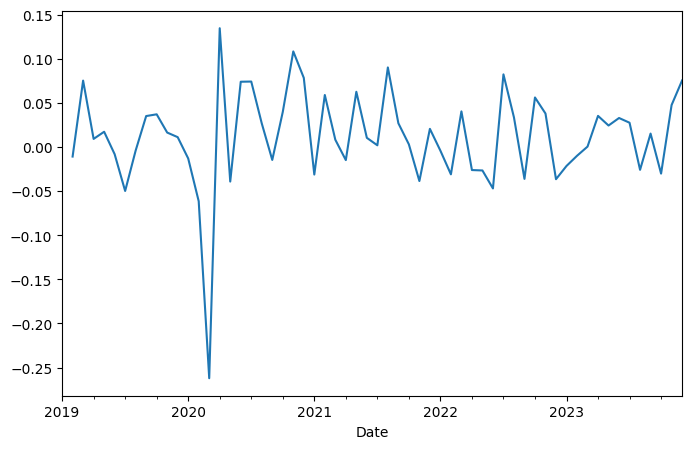

In [55]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

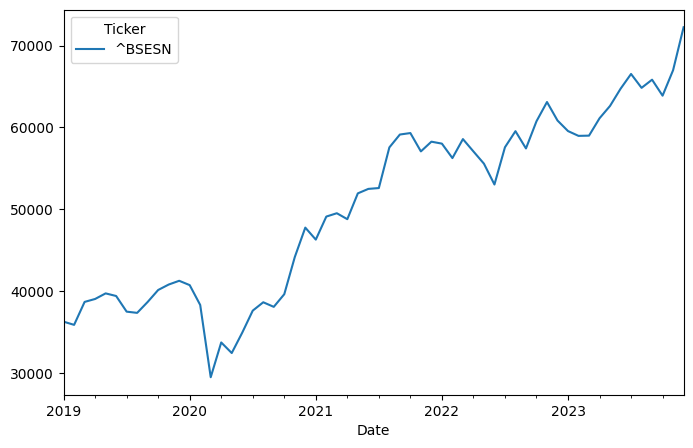

In [56]:
nifty_df['Close'].plot(figsize=(8,5))
plt.show()

In [57]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

Price,Close,High,Low,Open,Volume,Return_NIFTY
Ticker,^BSESN,^BSESN,^BSESN,^BSESN,^BSESN,
Date,,,,,,
2019-02-01,35867.441406,37172.179688,35287.160156,36311.738281,60134300,-0.010794
2019-03-01,38672.910156,38748.539062,35926.941406,36018.488281,318000,0.075309
2019-04-01,39031.550781,39487.449219,38460.250000,38858.878906,312900,0.009231
2019-05-01,39714.199219,40124.960938,36956.101562,39036.511719,396100,0.017338
2019-06-01,39394.640625,40312.070312,38870.960938,39806.859375,311500,-0.008079


In [58]:
#Caclulate log returns
kotak_df['Return_KOTAK'] = np.log(kotak_df['Close']/kotak_df['Close'].shift(1))
print(kotak_df['Return_KOTAK'])

Date
2019-01-01         NaN
2019-02-01   -0.034554
2019-03-01    0.095378
2019-04-01    0.038262
2019-05-01    0.093305
2019-06-01   -0.030043
2019-07-01    0.028334
2019-08-01   -0.059187
2019-09-01    0.138718
2019-10-01   -0.043468
2019-11-01    0.025521
2019-12-01    0.041921
2020-01-01    0.004384
2020-02-01   -0.043121
2020-03-01   -0.223321
2020-04-01    0.046102
2020-05-01   -0.103300
2020-06-01    0.105691
2020-07-01    0.003888
2020-08-01    0.025732
2020-09-01   -0.099837
2020-10-01    0.198978
2020-11-01    0.209008
2020-12-01    0.045361
2021-01-01   -0.152728
2021-02-01    0.038593
2021-03-01   -0.015481
2021-04-01   -0.002399
2021-05-01    0.033126
2021-06-01   -0.057992
2021-07-01   -0.030383
2021-08-01    0.058048
2021-09-01    0.134662
2021-10-01    0.012709
2021-11-01   -0.034689
2021-12-01   -0.088296
2022-01-01    0.033479
2022-02-01   -0.007838
2022-03-01   -0.049446
2022-04-01    0.020821
2022-05-01    0.030847
2022-06-01   -0.106001
2022-07-01    0.086040
2022-0

In [59]:
kotak_df1 = kotak_df.dropna(axis=0)
kotak_df1.head()

Price,Close,High,Low,Open,Volume,Return_KOTAK
Ticker,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,KOTAKBANK.NS,
Date,,,,,,
2019-02-01,1208.794189,1310.332529,1205.705217,1252.588266,132788832,-0.034554
2019-03-01,1329.763306,1359.806315,1213.029095,1217.363631,60933282,0.095378
2019-04-01,1381.628540,1392.041399,1312.375228,1331.257917,46138673,0.038262
2019-05-01,1516.747437,1550.377647,1361.450621,1381.628748,67704026,0.093305
2019-06-01,1471.857178,1535.430776,1445.949462,1507.829021,39102647,-0.030043


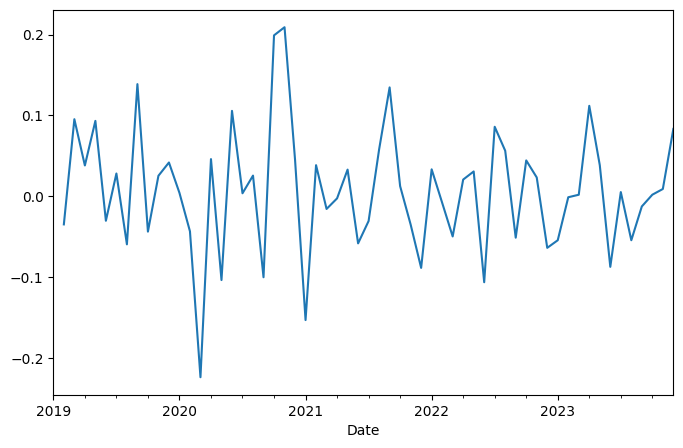

In [60]:
kotak_df['Return_KOTAK'].plot(figsize=(8,5))
plt.show()

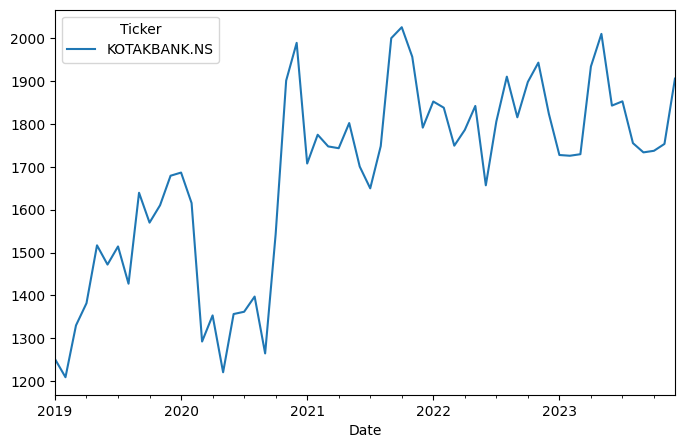

In [61]:
kotak_df['Close'].plot(figsize=(8,5))
plt.show()

In [62]:
kotak_df1_returns = kotak_df1['Return_KOTAK']
kotak_df1_returns.head()

,Return_KOTAK
Date,
2019-02-01,-0.034554
2019-03-01,0.095378
2019-04-01,0.038262
2019-05-01,0.093305
2019-06-01,-0.030043


In [63]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

,Return_NIFTY
Date,
2019-02-01,-0.010794
2019-03-01,0.075309
2019-04-01,0.009231
2019-05-01,0.017338
2019-06-01,-0.008079


In [64]:
returns = pd.merge(nifty_df1_returns,kotak_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_KOTAK
count,59.000000,59.000000
mean,0.011684,0.007133
std,0.056066,0.077646
min,-0.262058,-0.223321
25%,-0.018117,-0.043295
50%,0.011211,0.005401
75%,0.038908,0.043202
max,0.134699,0.209008


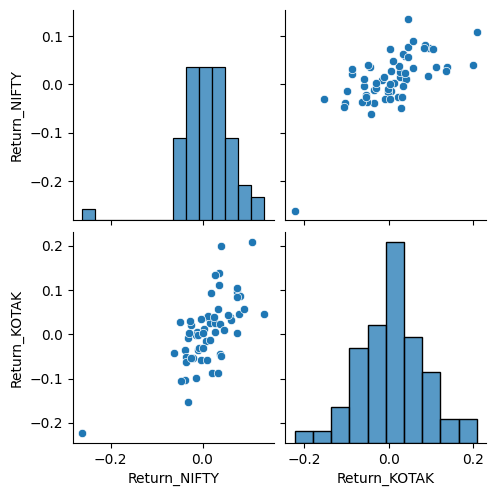

In [65]:
sns.pairplot(returns)
plt.show()

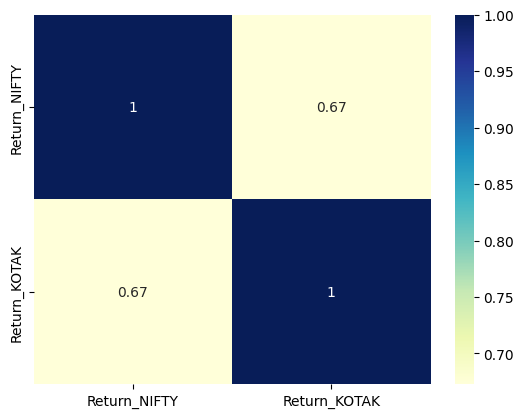

In [66]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [67]:
x = returns['Return_NIFTY']
y = returns['Return_KOTAK']
x_sm = sm.add_constant(x)

# Assumptions of OLS regression
A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters

The independent variables are not highly correlated with each other - no multicollinearity

The variance of the residuals is constant - no heteroskedasticity
Random sampling of observation and no autocorrelation
Assumption of Normality of Errors

## Ri = αi + βi(RM) + εi.........Market model

* Ri = Return of security

* αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

* βi = Beta or the return from the security explained by the market index’s return

* RM = The market index’s return

* εi = Error term for past returns not explained by the regression equation

In [68]:
#Regression - Market model
model = sm.OLS(y,x_sm)

In [69]:
results = model.fit()

In [70]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Return_KOTAK   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     47.11
Date:                Mon, 14 Apr 2025   Prob (F-statistic):           5.37e-09
Time:                        14:02:38   Log-Likelihood:                 85.337
No. Observations:                  59   AIC:                            -166.7
Df Residuals:                      57   BIC:                            -162.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0038      0.008     -0.487      0.628      -0.019       0.012
Return_NIFTY     0.9316      0.136      6.863      0.000       0.660       1.203
==============================================================================
Omnibus:                        2.080   Durbin-Watson:                   2.211
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.307
Skew:                           0.313   Prob(JB):                        0.520
Kurtosis:                       3.375   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Beta for Kotak stock = 0.9316, Beta is highly statistically significant




In [71]:
beta = 0.9316

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2019-02-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_KOTAK  59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


<Axes: xlabel='Return_NIFTY', ylabel='Return_KOTAK'>

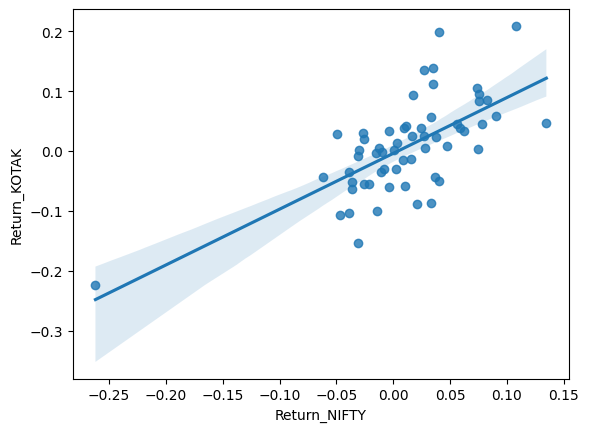

In [72]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_KOTAK', data = returns)

In [73]:
print('resid', results.resid)

resid Date
2019-02-01   -0.020746
2019-03-01    0.028973
2019-04-01    0.033415
2019-05-01    0.080905
2019-06-01   -0.018765
2019-07-01    0.078472
2019-08-01   -0.051741
2019-09-01    0.109750
2019-10-01   -0.074283
2019-11-01    0.013967
2019-12-01    0.035229
2020-01-01    0.020188
2020-02-01    0.017854
2020-03-01    0.024560
2020-04-01   -0.075629
2020-05-01   -0.063105
2020-06-01    0.040471
2020-07-01   -0.061528
2020-08-01    0.004520
2020-09-01   -0.082472
2020-10-01    0.165641
2020-11-01    0.111774
2020-12-01   -0.023942
2021-01-01   -0.119936
2021-02-01   -0.012641
2021-03-01   -0.019460
2021-04-01    0.015130
2021-05-01   -0.021506
2021-06-01   -0.063969
2021-07-01   -0.028478
2021-08-01   -0.022257
2021-09-01    0.113279
2021-10-01    0.013620
2021-11-01    0.004964
2021-12-01   -0.103754
2022-01-01    0.041072
2022-02-01    0.024728
2022-03-01   -0.083366
2022-04-01    0.048868
2022-05-01    0.059323
2022-06-01   -0.058530
2022-07-01    0.013070
2022-08-01    0.028890


<ipython-input-74-a89ebdceef41>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid)


,0
count,5.900000e+01
mean,-8.232586e-18
std,5.745337e-02
min,-1.199360e-01
25%,-2.739079e-02
50%,4.520161e-03
75%,2.893112e-02
max,1.656413e-01


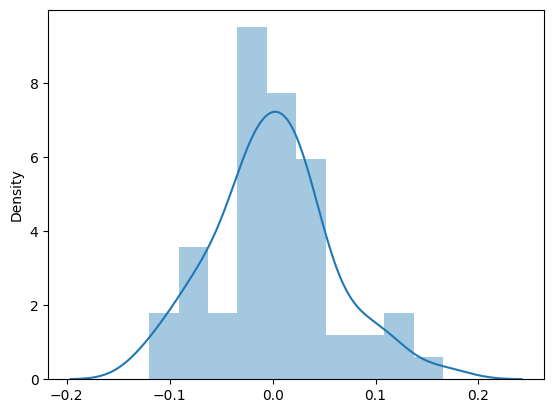

In [74]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

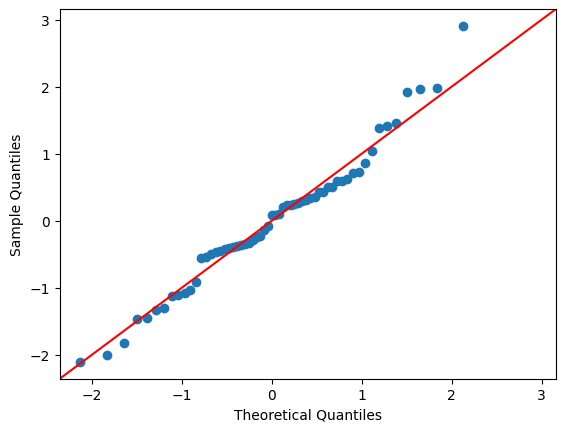

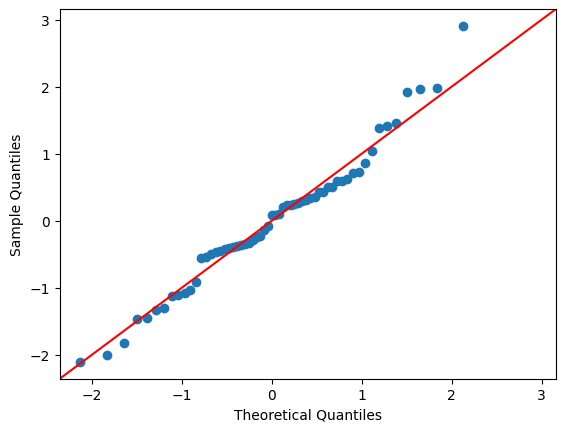

In [75]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [76]:
stats.normaltest(results.resid)

NormaltestResult(statistic=np.float64(2.080337840691475), pvalue=np.float64(0.35339498131416974))

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line. The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level.

In [77]:
avg_monthly_return = nifty_df['Return_NIFTY'].mean()
annualized_market_return = (1 + avg_monthly_return) ** 12 - 1

annualized historical market return is often used as a proxy for the expected market return in CAPM

In [78]:
expected_market_return = annualized_market_return

In [79]:
# Risk free rate from https://epwrfits.in/
risk_free_rate = 0.069585

cost_of_equity = risk_free_rate + beta * (expected_market_return - risk_free_rate)
print(f"\nCost of Equity (using CAPM): {cost_of_equity:.4f} or {cost_of_equity*100:.2f}%")


Cost of Equity (using CAPM): 0.1441 or 14.41%


We calculated the cost of equity capital using CAPM model which came out to be 0.1441 or 14.41%